In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [3]:
data_path = "../../../DataSets/IMDB_Cleaned/clean_data.csv"
df = pd.read_csv(data_path, index_col=[0])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SentimentText  25000 non-null  object
 1   Sentiment      25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


,SentimentText,Sentiment
0,first think another disney movie might good it...,1
1,put aside dr house repeat missed desperate hou...,0
2,big fan stephen king s work film made even gre...,1
3,watched horrid thing tv needless say one movie...,0
4,truly enjoyed film acting terrific plot jeff c...,1


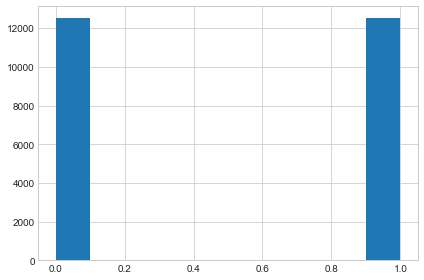

In [4]:
df['Sentiment'].hist()

In [5]:
df['Sentiment']+1#.plot.bar()

0        2
1        1
2        2
3        1
4        2
        ..
24995    1
24996    2
24997    1
24998    1
24999    2
Name: Sentiment, Length: 25000, dtype: int64

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
#?TfidfVectorizer

Convert each text review into a vector.
Every component of this vector is a TFIDF of a corresponding word in the text.
As a result all vectors have the same length, equal to the number of words in the corpus dictionary. 

Vectors are very sparse (contain a lot of zeroes) becase text of every review has only a few words.

TFIDF values are bigger for words that have a high frequence in the document (review) and can be found in a small number of corpus documents.


In [7]:
def cnt_non_zeroes(xs):
    cnt = 0
    for x in xs:
        if x > 0:
            cnt += 1
    return cnt

In [8]:
def text2vec(text, ngram_range):
    """ Vectorize text
        
        Args:
            text - collection of text message
            ngram_range - tuple with min and max ngram we need, 
                such as (1,2) - unigrams and bigrams
        
        Returns: 
            dictionary with keys:
                matrix_shape - vector matrix shape
                df - df with TFIDF vectors of the text
                non_zero_cnts - collection where each element corresponds to
                    a TFIDF vector. Each element of the collection is equal to 
                    a count of non-zero elements in the vector
                sparsity: - float <=1 number of non-zero elements divided by 
                    number of all TFIDF matrix elements 
                
    """
    # Using default tokenizer in TfidfVectorizer
    tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=ngram_range)
    features = tfidf.fit_transform(text)
    matrix = features.todense()
    matrix_shape = matrix.shape
    df = pd.DataFrame(matrix,columns=tfidf.get_feature_names())
    # Calculate sparsity of vectors
    non_zero_cnts = df.apply(lambda xs : cnt_non_zeroes(xs), axis=1) # sum each row
    sparsity = non_zero_cnts.sum() / (matrix_shape[0]*matrix_shape[1])
    return {'matrix_shape':matrix_shape, 'df':df, 
            'non_zero_cnts':non_zero_cnts, 'sparsity':sparsity }

In [9]:
result_1 = text2vec(df['SentimentText'], ngram_range=(1,1))
result_1['sparsity']

0.0022875802145087567

In [10]:
result_2 = text2vec(df['SentimentText'], ngram_range=(1,2))
result_2['sparsity']

0.00045359900306125216

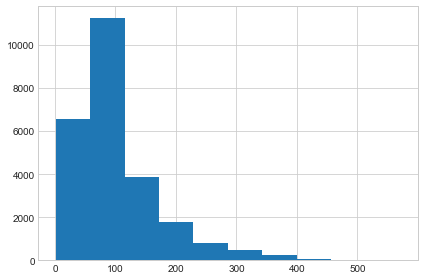

In [11]:
result_1['non_zero_cnts'].hist()

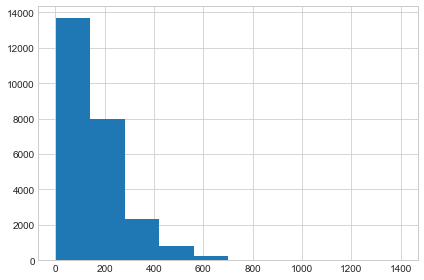

In [12]:
result_2['non_zero_cnts'].hist()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(result_1['df'], df['Sentiment'],
                                                        random_state=78)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(result_2['df'], df['Sentiment'],
                                                        random_state=78)

In [ ]:
clf_1 = LogisticRegression(random_state=78).fit(X1_train, y1_train)

In [ ]:
clf_2 = LogisticRegression(random_state=78).fit(X2_train, y2_train)

In [ ]:
y1_hat = clf_1.predict(X1_test)

In [ ]:
y2_hat = clf_2.predict(X2_test)

By definition a confusion matrix C is such that  C(i,j) is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(
1,0), true positives is C(1,1) and false positives is C(0,1).

TN FP
FN TP

In [ ]:
print(confusion_matrix(y1_test, y1_hat, normalize='all'))

In [ ]:
print(confusion_matrix(y2_test, y2_hat, normalize='all'))

In [ ]:
print(classification_report(y1_test, y1_hat))

In [ ]:
print(classification_report(y2_test, y2_hat))